# Notebook for viewing model predictions

#### First, set up the preliminaries for viewing predictions.

In [1]:
%matplotlib inline

import tensorflow as tf 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # only print errors
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

In [2]:
# set up logging
import logging
logging.basicConfig(level = logging.INFO)

In [3]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


Default GPU Device:/device:GPU:0


In [4]:
%env RAMP_HOME=/content/drive/MyDrive/Omdena/RAMP_HOME/
#env RAMP_HOME=/content/drive/MyDrive/code/projects/ramp-staging-test/ramp-staging/colab

env: RAMP_HOME=/content/drive/MyDrive/Omdena/RAMP_HOME/


In [5]:
import sys
sys.path.append("..")
from pathlib import Path
RAMP_HOME = os.environ["RAMP_HOME"]

In [6]:
from ramp.data_mgmt.data_generator import test_batches_from_gtiff_dirs_with_names
from ramp.data_mgmt.display_data import display_img_mask_pred_batch, get_mask_from_prediction

#### Step 1: Set your saved model location.

In [7]:
#Change path to your desired path
MODEL_PATH_1 = Path(RAMP_HOME) /"ramp-data/TRAIN/HOTOSM/1/model-checkpts/20221028-205853/model_20221028-205853_020_0.986.tf"
MODEL_PATH_2 = Path(RAMP_HOME) /"ramp-data/TRAIN/HOTOSM/2/model-checkpts/20221029-160116/model_20221029-160116_048_0.949.tf"
MODEL_PATH_3 = Path(RAMP_HOME) /"ramp-data/TRAIN/HOTOSM/3/model-checkpts/20221029-164007/model_20221029-164007_049_0.963.tf"
MODEL_PATH_4 = Path(RAMP_HOME) /"ramp-data/TRAIN/HOTOSM/4/model-checkpts/20221028-221729/model_20221028-221729_034_0.961.tf"
MODEL_PATH_5 = Path(RAMP_HOME) /"ramp-data/TRAIN/HOTOSM/5/model-checkpts/20221029-025626/model_20221029-025626_040_0.911.tf"


In [8]:
#which dataset to test
dataset = 5
MODEL_PATH = MODEL_PATH_5

#### Step 3: Set batchsize, input and output image sizes.

Batchsize is whatever number of files you'd like to display in a single image. I recommend keeping batch_size small for good conversion to pdfs (using 'nbconvert' or any other jupyter notebook rendering tool). 

Numbatches is the total number of image batches you'd like to display. This can be as large as you like. 

Image sizes should be set to their values during training. 



In [9]:
# sample configuration
NUMBATCHES = 5 # number of batches to display
BATCH_SIZE = 4 # size per batch -- I recommend keeping this small for better pdf output
INPUT_IMAGE_SIZE = (256, 256)
OUTPUT_IMAGE_SIZE = (256, 256)

test_img_dir = str(Path(RAMP_HOME) / f"ramp-data/TRAIN/HOTOSM/{dataset}/val-chips")

# mask type. Comment out the type of mask (binary vs. multichannel) that you are not using. 
test_mask_dir = str(Path(RAMP_HOME) / f"ramp-data/TRAIN/HOTOSM/{dataset}/val-binarymasks")


In [10]:
test_img_dir

'/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips'

### END CONFIGURATION, begin code for viewing model predictions

In [12]:
# set up batches for display
test_batches = test_batches_from_gtiff_dirs_with_names(
                                            test_img_dir, 
                                            test_mask_dir, 
                                            BATCH_SIZE, 
                                            INPUT_IMAGE_SIZE, 
                                            OUTPUT_IMAGE_SIZE)

# load model
model = tf.keras.models.load_model(MODEL_PATH)
#model.summary()

### Coding notes

#### This notebook uses a data generator that returns the filenames of the chips and masks as well as the chips and masks. 

You can iterate through batches multiple times to display more results. In this code, I iterate through and display two batches. 

##### Iterating over batches

You have to be a bit careful how you iterate through batches, or you'll get confusing bugs like I did. 

Iterate through batches using this code:

```
test_batches = test_batches_from_gtiff_dirs_with_names(
                                            test_img_dir, 
                                            test_mask_dir, 
                                            BATCH_SIZE, 
                                            INPUT_IMAGE_SIZE, 
                                            OUTPUT_IMAGE_SIZE)
                                            
# these test batches are streaming. Create an iterator for them.
iterator = iter(test_batches)
batch = iterator.get_next()
```

When you want to get a new batch, call iterator.get_next() again.

##### Structure of data in each batch

In each batch, batch[0] contains all the data associated with the image chips. It's a 2-tuple: the first element, batch[0][0], is the image batch tensor, and batch[0][1] is a list of image names in the batch. 

Batch[1] is data associated with masks: batch[1][0] is the mask batch tensor and batch[1][1] is a list of mask names.

In [13]:
# Take one batch from the data generator. 

iterator = iter(test_batches)
batch = iterator.get_next()
chips = batch[0][0]
masks = batch[1][0]
chipnames = batch[0][1] 
masknames = batch[1][1]
start = perf_counter()
prediction = model.predict(chips)
end = perf_counter()

print(f"Time taken to execute code : {end-start}")
# Predictions are one-hot encoded by default. 
# Binary predictions will have two channels. 
# Multichannel predictions will have four channels 
print(f"Prediction shape: {prediction.shape}")

# we flatten the channels (by taking their max) 
# to make a mask with only 1 channel from the prediction.
predmask = get_mask_from_prediction(prediction)
print(f"Sparse prediction shape: {predmask.shape}")


1/1 [==============================] - 5s 5s/step
Time taken to execute code : 6.491445030999785
Prediction shape: (4, 256, 256, 4)
Sparse prediction shape: (4, 256, 256, 1)


LIST OF CHIP FILES
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263581-1056185-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263575-1056180-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631760-528102-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263526-1056205-21.tif


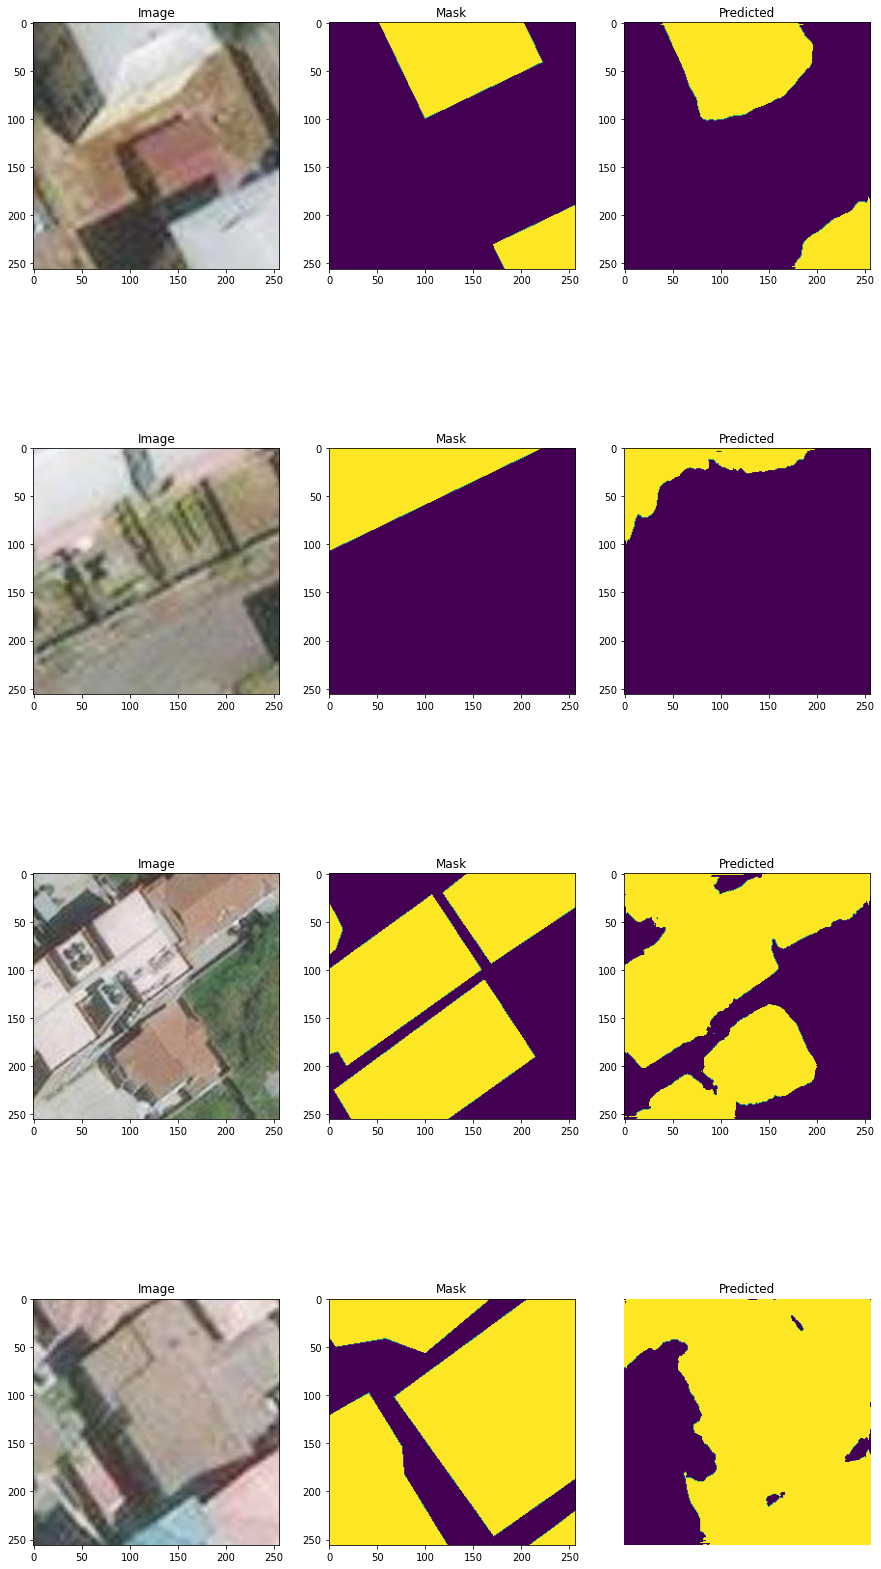

In [14]:
# display the output of the trained model.
print("LIST OF CHIP FILES")
print('\n'.join([name_tensor.numpy().decode('utf-8') for name_tensor in chipnames]))
display_img_mask_pred_batch(chips, masks, predmask)

In [15]:
def display_batch(model, iterator):
    batch = iterator.get_next()
    chips = batch[0][0]
    masks = batch[1][0]
    chipnames = batch[0][1] 
    prediction = model.predict(chips)
    predmask = get_mask_from_prediction(prediction)
    print("LIST OF CHIP FILES")
    print('\n'.join([name_tensor.numpy().decode('utf-8') for name_tensor in chipnames]))
    display_img_mask_pred_batch(chips, masks, predmask)
    return

1/1 [==============================] - 0s 26ms/step
LIST OF CHIP FILES
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263583-1056178-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631790-528094-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263570-1056188-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631791-528094-20.tif


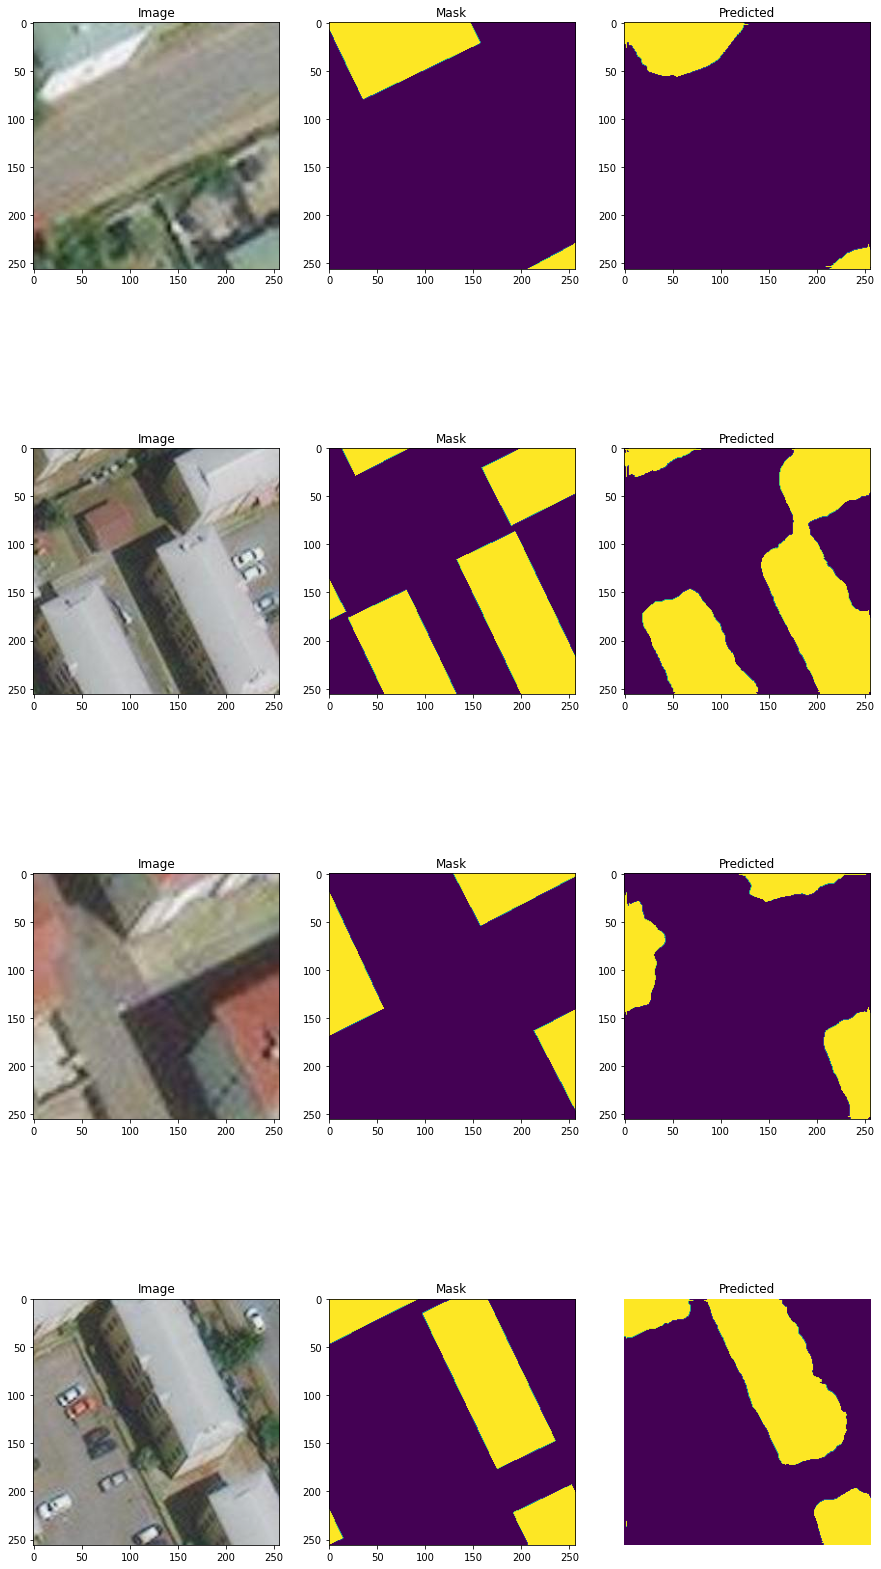

1/1 [==============================] - 0s 27ms/step
LIST OF CHIP FILES
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631761-528101-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631763-528103-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263569-1056185-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263518-1056204-21.tif


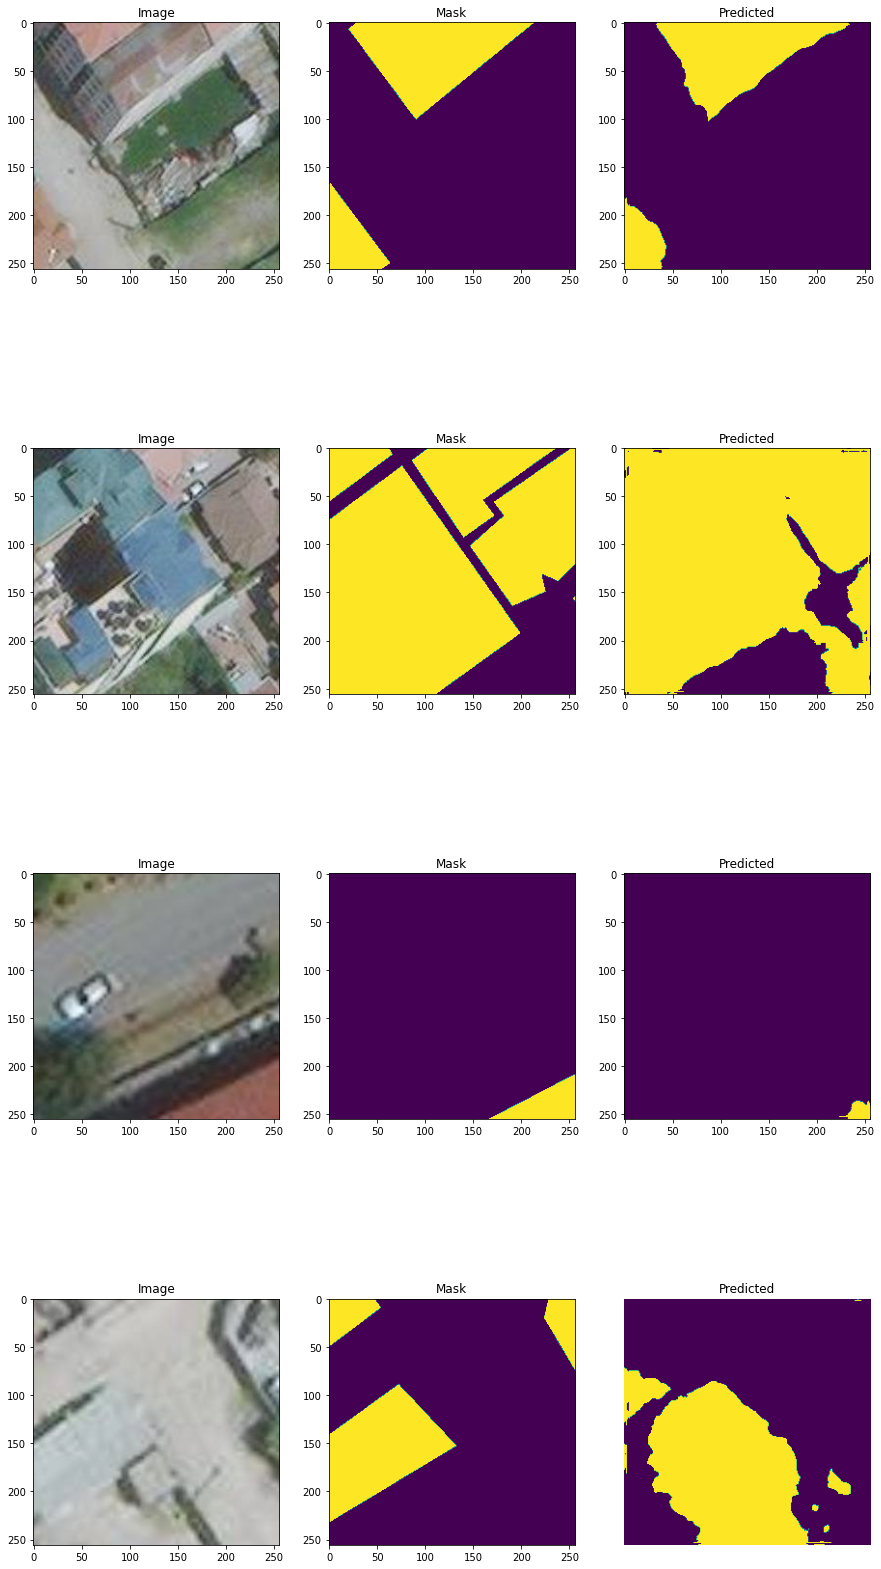

1/1 [==============================] - 0s 28ms/step
LIST OF CHIP FILES
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263523-1056205-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263579-1056185-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263582-1056189-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263520-1056200-21.tif


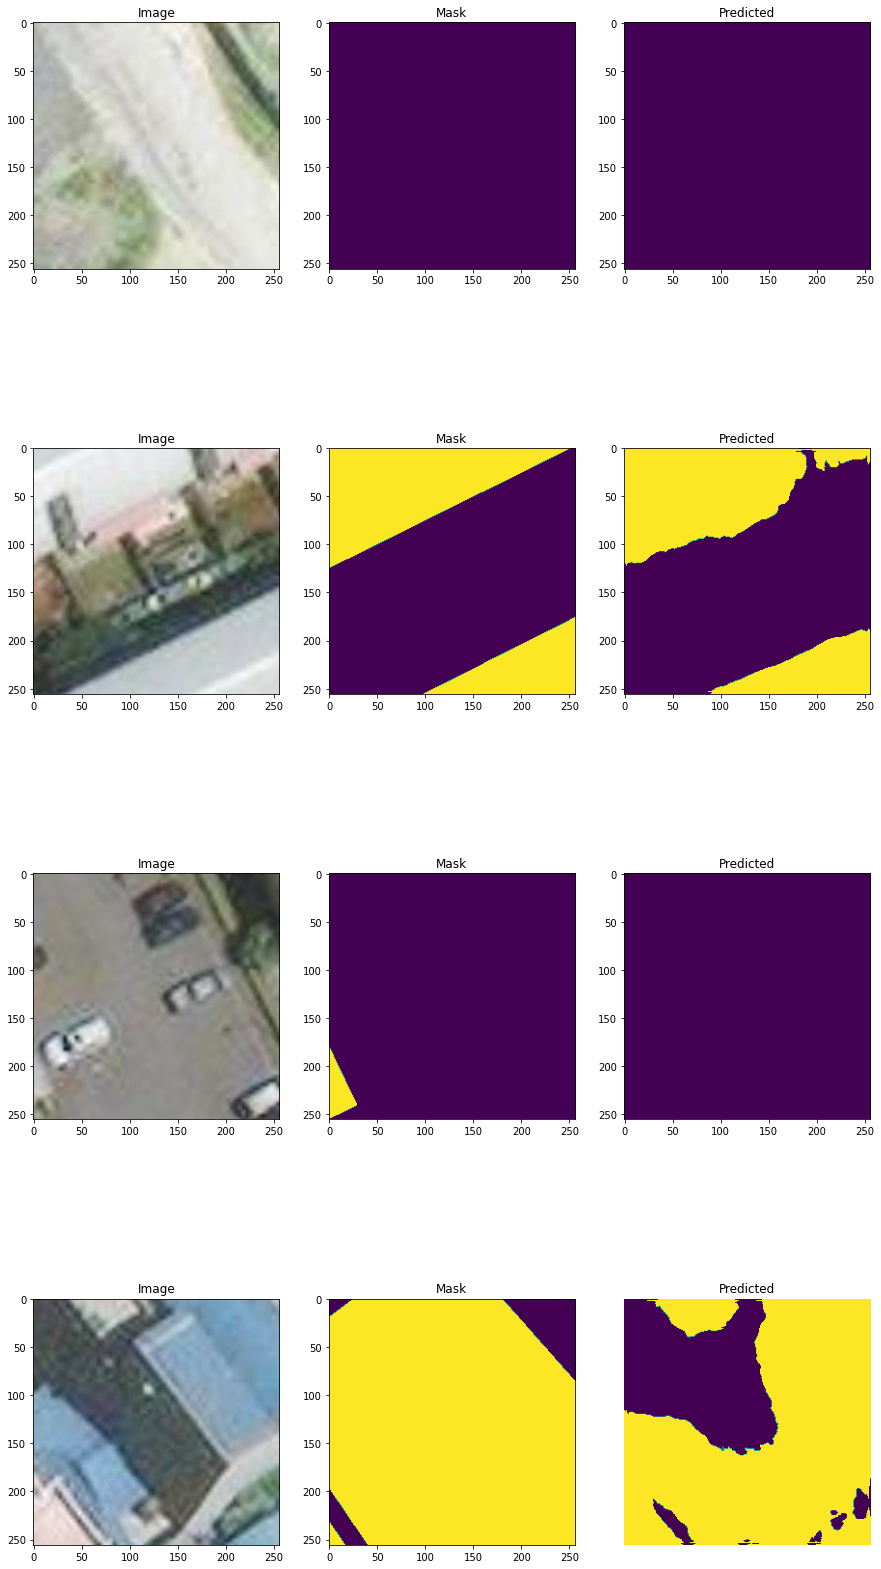

1/1 [==============================] - 0s 26ms/step
LIST OF CHIP FILES
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263571-1056177-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263521-1056206-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263515-1056204-21.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631784-528094-20.tif


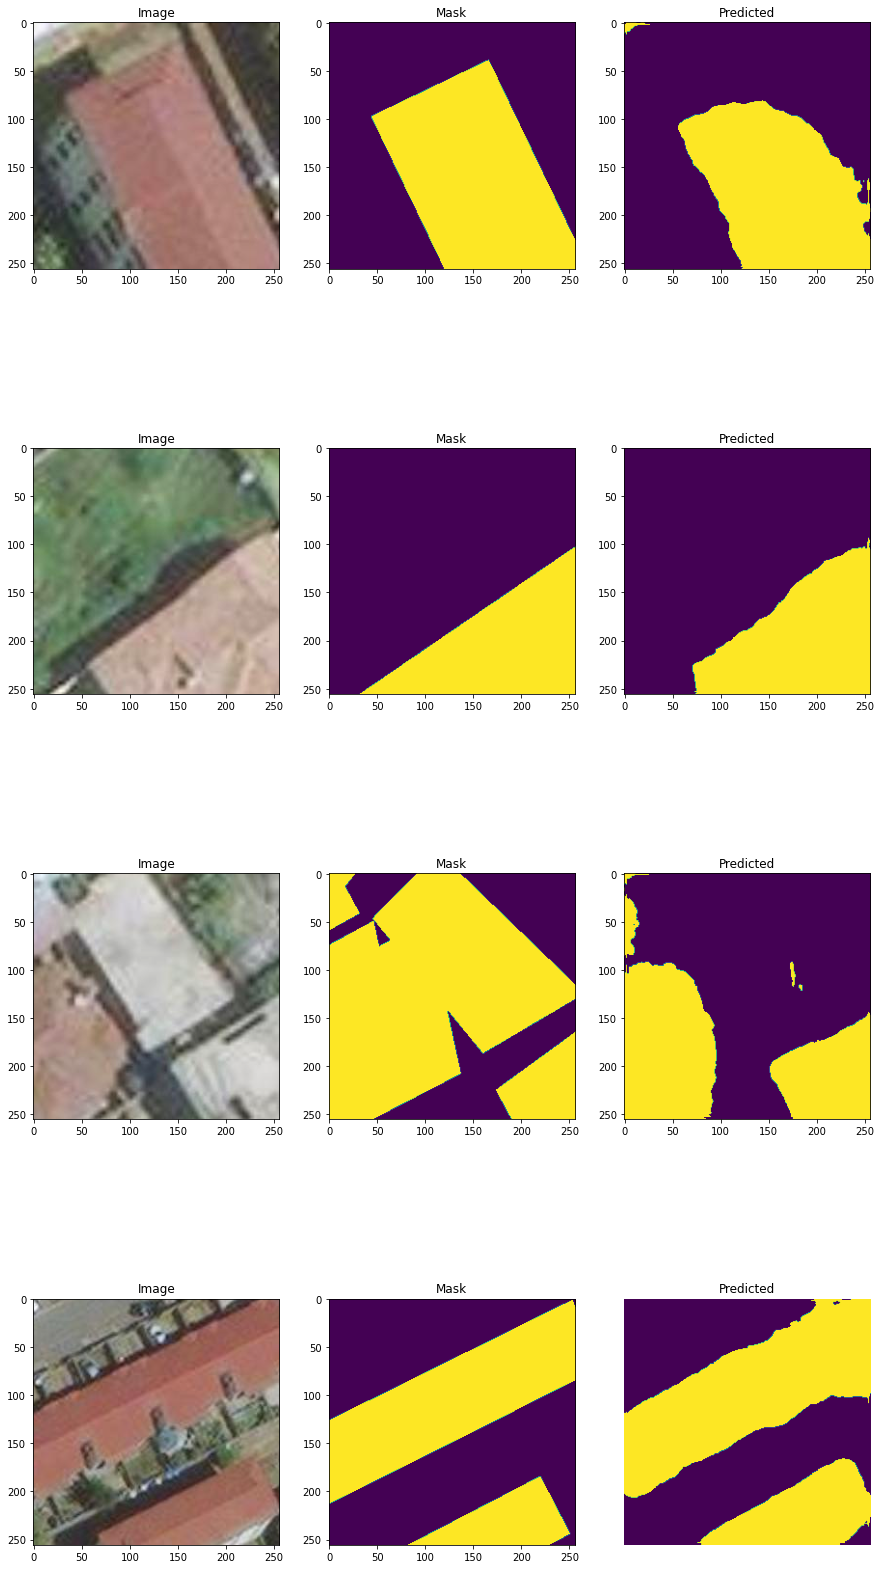

1/1 [==============================] - 0s 27ms/step
LIST OF CHIP FILES
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631788-528090-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631789-528088-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-631756-528101-20.tif
/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/5/val-chips/OAM-1263582-1056177-21.tif


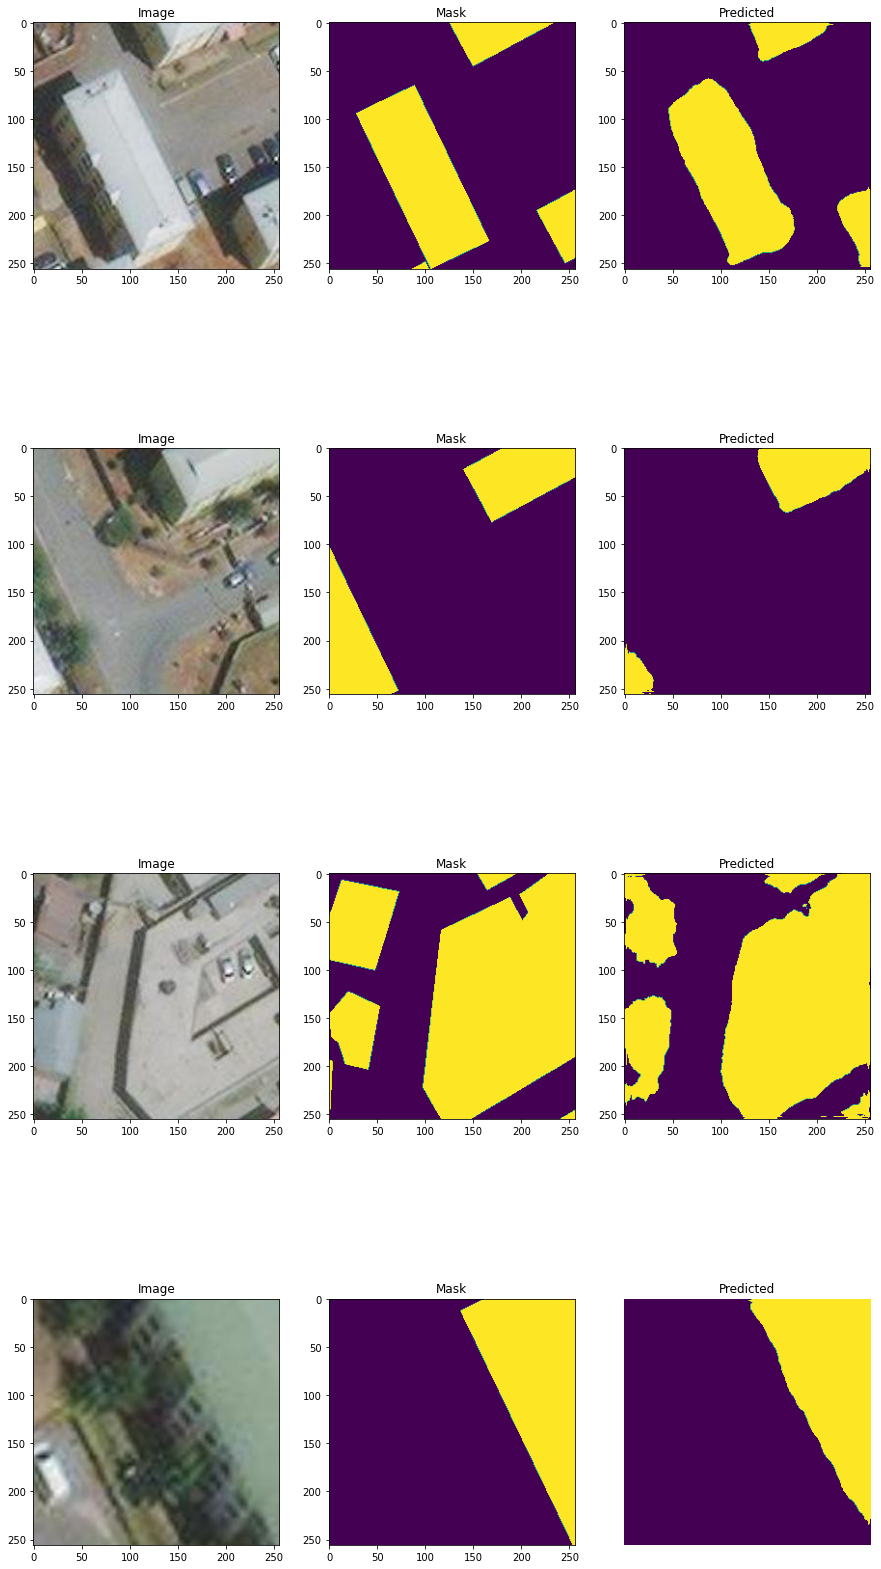

In [16]:
for ii in range(NUMBATCHES):
    display_batch(model, iterator)